## TSF-3 Prediction using Decision Tree Algorithm
## Submitted by Jalees Ahmad

### Importing all the required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset 

In [2]:
iris_df=pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Overview of Dataset

In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Checking Null values

In [4]:
iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Description of the dataset

In [5]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


#### From above describe function we can interpret that there are 150 row. Describe function also provide other information about dataset such as mean value,max, min etc of each column.

In [6]:
iris_df.drop('Id',axis=1,inplace=True) #Dropping Id column

In [7]:
iris_df.head() # Data after dropping id column

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Count plot to visually represent number data of each species

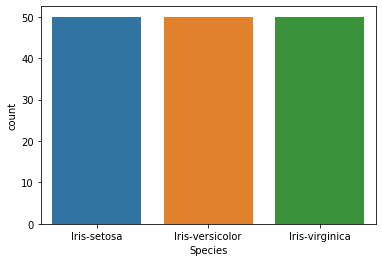

In [8]:
sns.countplot('Species',data=iris_df)
plt.show()

#### From above count plot we can observe that there are 50 data of each species

### Pairplot to show pairwise relationships

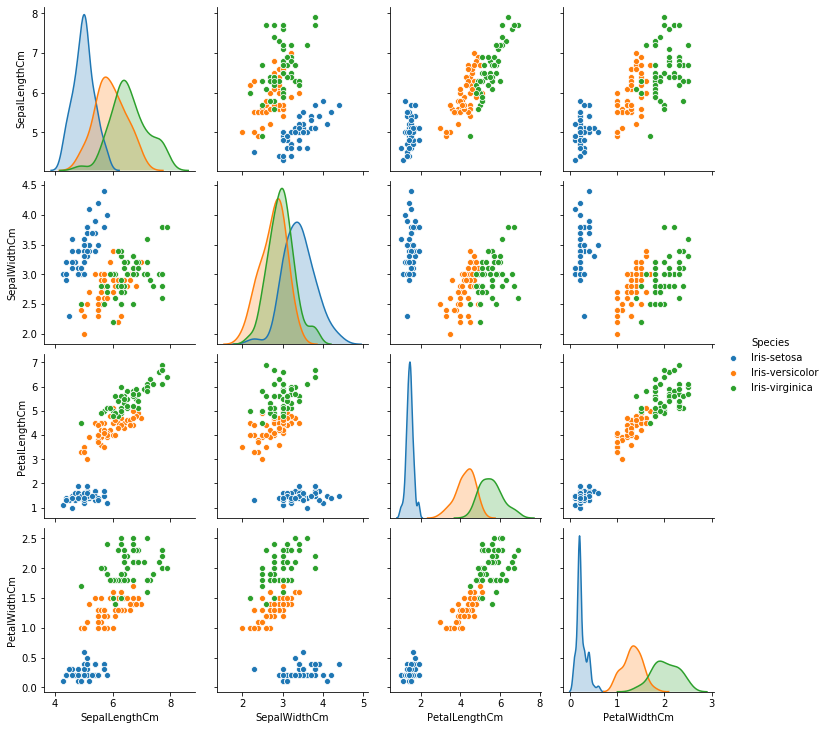

In [9]:
sns.pairplot(iris_df,hue='Species')
plt.show()

#### From above pairpot we can see data distribution of each species of each column. Form above pairplot we can observe that 'Iris-setosa' makes distinct cluster in all case.

### Heatmap to show correlation

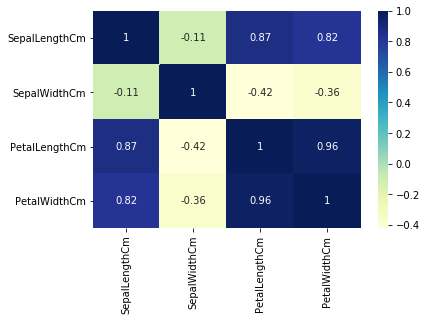

In [10]:
sns.heatmap(iris_df.corr(),annot=True,cmap="YlGnBu")

#### Above heatmap show the correlation between each columns. From above heatmap we can observe that ('PetalLength' and 'PetalWidth'), ('PetalLength' and 'SepalLength') and ('PetalWidth and SepalLength) are highly correlated.

### Histogram for data distribution

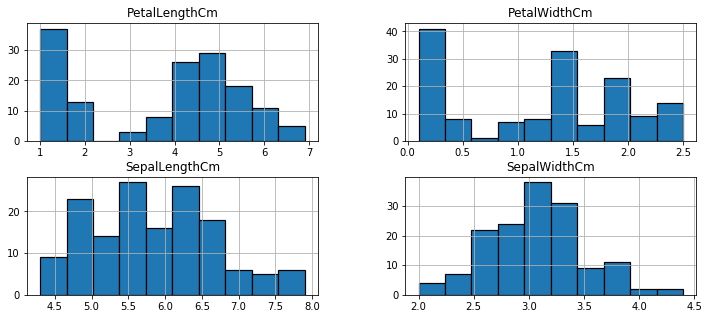

In [11]:
iris_df.hist(edgecolor='black',linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,5)

#### In above Histogram we can see how data is distributed in each column


### Normalizing the values using Min-Max Scaler

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
for col in iris_df.columns:
    if iris_df[col].dtype in ['int64','float64']:
        iris_df[col]=scaler.fit_transform(iris_df[[col]])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


#### By using minmax scaler we are scaling the values of all the Feature in range [0,1].

### Label Encoding

In [13]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
iris_df['Species']=le.fit_transform(iris_df['Species'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


#### By label encoding we are encoding the species column

In [14]:
x=iris_df.drop('Species',1) #Feature
y=iris_df['Species']        #Target

### Train-Test split of the dataset in the ratio 80:20 

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

### Feature Selection using PCA

In [16]:
from sklearn.decomposition import PCA
pca=PCA()
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [17]:
explained_variance=pca.explained_variance_ratio_
explained_variance
# Variance of each column

array([0.8443757 , 0.11836769, 0.03153286, 0.00572375])

In [18]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape
# shape of train and test set

((120, 4), (30, 4), (120,), (30,))

### Building Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Predicting the values of test data

In [20]:
y_pred=model.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

### Finding accuracy of the model

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy',accuracy_score(y_test,y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Accuracy 0.9666666666666667


### Visual representation of the Decision Tree Classifier

D:\My_Work\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


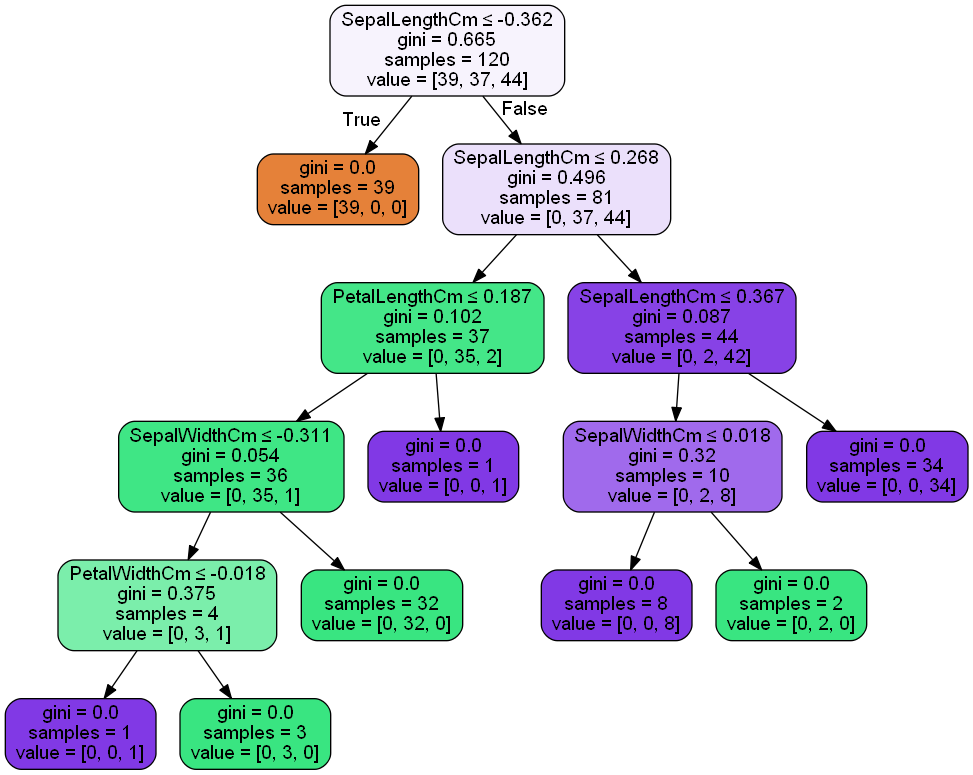

In [22]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())